# Agriculture Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import os
import lightgbm as lgb
from collections import Counter

In [2]:
#load Dataset
df_train = pd.read_csv('train_agriculture.csv', header=0)
df_test = pd.read_csv('test_agriculture.csv', header=0)

In [3]:
df_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [5]:
#some basic insights 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [6]:
#Check for null values
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [7]:
#remove null values
df_test['Number_Weeks_Used'].fillna(value=df_test['Number_Weeks_Used'].mean(), inplace=True)

In [8]:
#Check 
df_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [9]:
#frequency of categories
for col in df_test.columns:
    if df_test[col].dtype=="int64":
        print(df_test[col].value_counts())
        print()

1132    58
915     49
1056    48
1385    47
851     45
        ..
3896     2
257      2
3515     2
3336     1
4096     1
Name: Estimated_Insects_Count, Length: 70, dtype: int64

0    966
1    233
Name: Crop_Type, dtype: int64

0    653
1    546
Name: Soil_Type, dtype: int64

2    695
3    482
1     22
Name: Pesticide_Use_Category, dtype: int64

20    293
40    166
30    162
10    156
15     99
5      70
60     62
50     50
25     48
35     28
0      22
45     14
80     10
55      7
70      6
65      3
90      2
75      1
Name: Number_Doses_Week, dtype: int64

0     539
16     39
3      34
7      33
8      33
12     33
13     33
2      32
5      31
6      31
1      27
10     27
15     26
20     25
4      23
18     23
11     23
17     21
14     19
19     19
9      18
21     17
27     14
22     13
23     11
25      9
24      8
30      6
28      6
26      4
32      3
33      3
34      3
39      3
29      2
36      2
31      1
35      1
41      1
37      1
40      1
42      1
Name: Number_W

In [10]:
#frequency of categories
for col in df_test.columns:
    if df_test[col].dtype=="float64":
        print(df_test[col].value_counts())
        print()

29.033333    119
20.000000     49
30.000000     48
25.000000     45
35.000000     44
22.000000     39
18.000000     37
28.000000     35
40.000000     32
15.000000     30
16.000000     30
34.000000     29
24.000000     27
26.000000     27
21.000000     27
23.000000     26
36.000000     26
27.000000     26
31.000000     23
43.000000     23
37.000000     22
32.000000     22
14.000000     21
50.000000     21
29.000000     21
19.000000     21
13.000000     18
0.000000      18
33.000000     17
41.000000     16
17.000000     16
45.000000     16
38.000000     16
10.000000     16
12.000000     16
49.000000     15
39.000000     14
42.000000     13
46.000000     12
54.000000     12
44.000000     12
5.000000      12
47.000000     12
51.000000      9
57.000000      8
59.000000      7
53.000000      7
48.000000      7
52.000000      7
6.000000       6
11.000000      5
9.000000       5
56.000000      4
58.000000      4
7.000000       3
55.000000      2
8.000000       2
62.000000      1
64.000000     

In [11]:
df_test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [12]:
#Lets check some statistical insights
df_test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.130647,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,29.033333,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [13]:
#basic insights of Train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [14]:
#check for null values
df_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [15]:
#remove null values
df_train['Number_Weeks_Used'].fillna(value=df_train['Number_Weeks_Used'].mean(), inplace=True)

In [16]:
#check
df_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [17]:
#frequency of categories
for col in df_train.columns:
    if df_train[col].dtype=="int64":
        print(df_train[col].value_counts())
        print()

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64

0    3565
1    1034
Name: Crop_Type, dtype: int64

0    2407
1    2192
Name: Soil_Type, dtype: int64

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64

0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7      122
9      118
4      117
11     116
16     105
17      94
19      87
18      83
22      83
21      74
23      54
24      52
25      48
28      46
29      41
26      41
27      37
30      34
31      25
32      21
33      16
34

In [18]:
#Statistical insights of train dataset
df_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


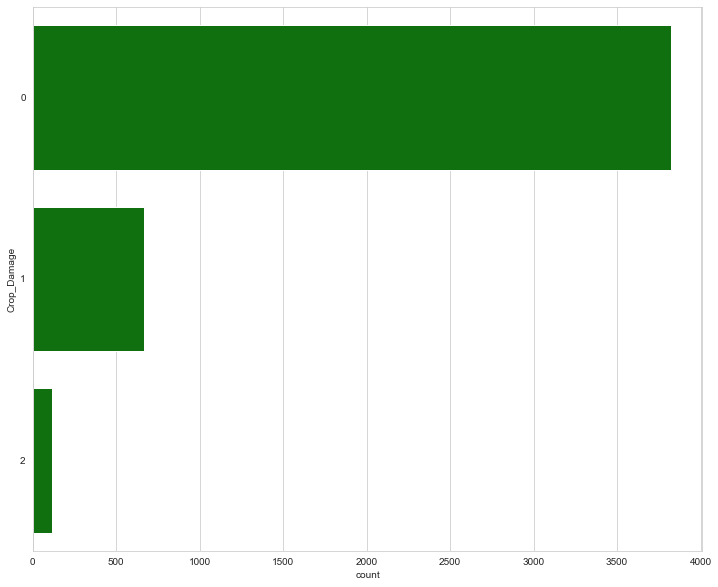

In [19]:
# We see crops are more damage due to other reasons than damage due to pesticides, & one fourth of the crops are damaged
sns.countplot(y='Crop_Damage',data=df_train,color='g')
plt.show()

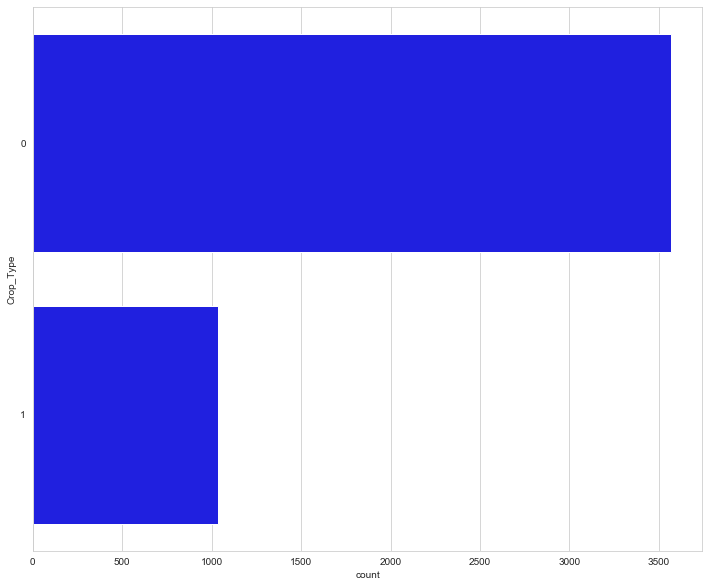

In [20]:
# crop type 0 is widely used
sns.countplot(y='Crop_Type',data=df_train,color='b')
plt.show()

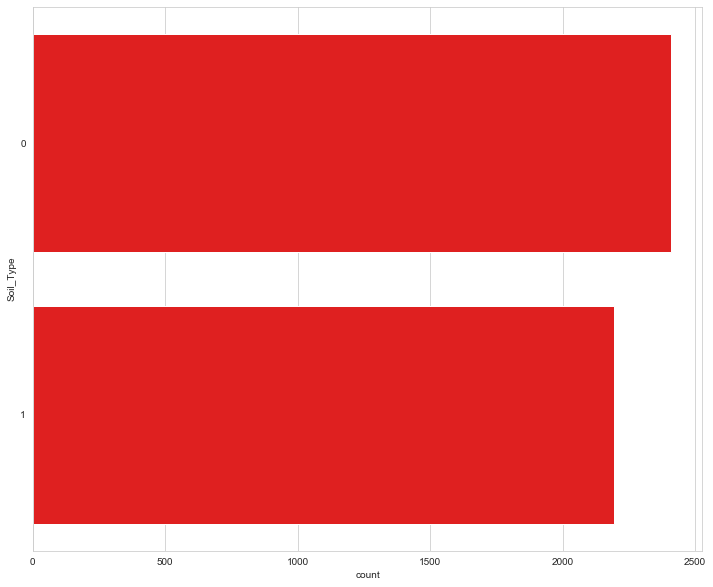

In [21]:
# soil type is mostly 0
sns.countplot(y='Soil_Type',data=df_train,color='r')
plt.show()

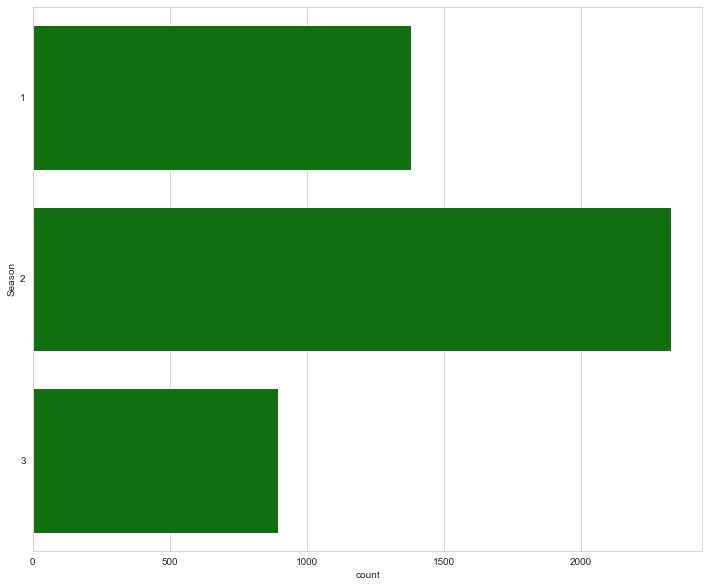

In [22]:
# season is mostly 2 followed by 1 and 0
sns.countplot(y='Season',data=df_train,color='g')
plt.show()

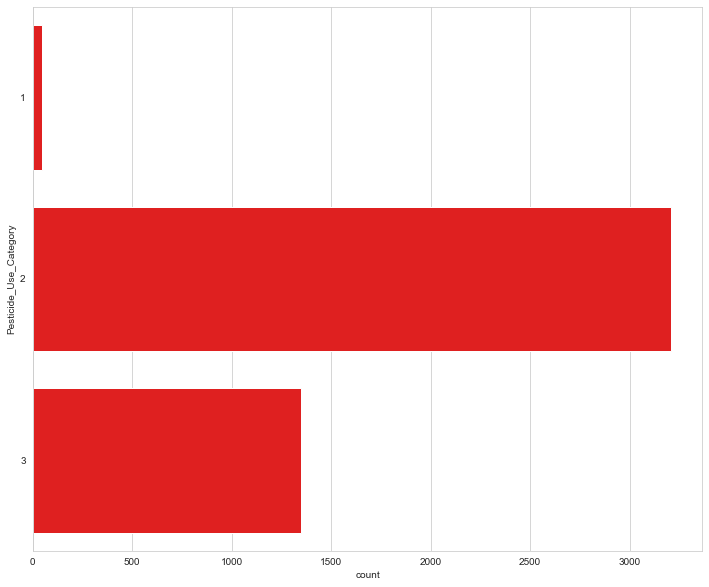

In [23]:
# pesticides were previosly used more than currenty used.
sns.countplot(y='Pesticide_Use_Category',data=df_train,color='r')
plt.show()

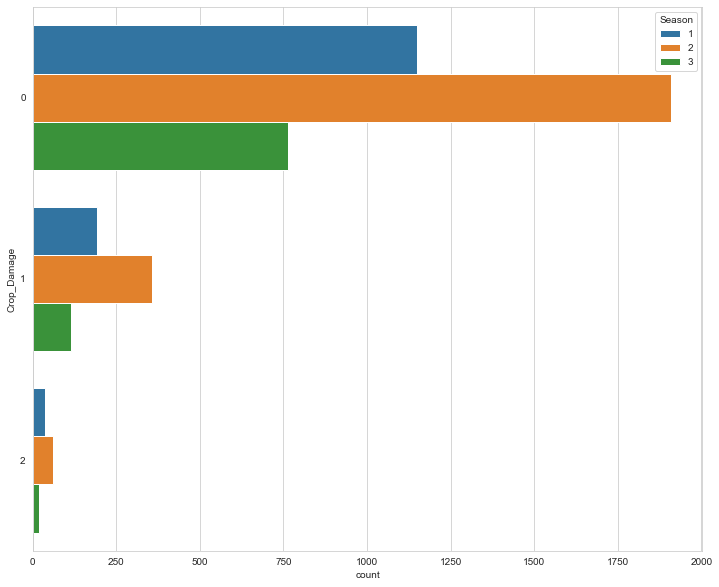

In [24]:
# crop damage is more in season 2 due to other reasons
sns.countplot(hue='Season',y='Crop_Damage',data=df_train)
plt.show()

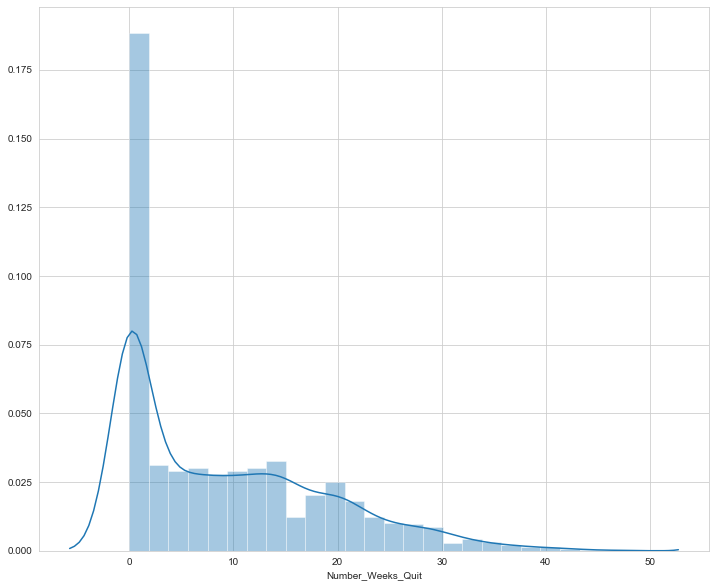

In [25]:
sns.distplot(df_train["Number_Weeks_Quit"])
plt.show()

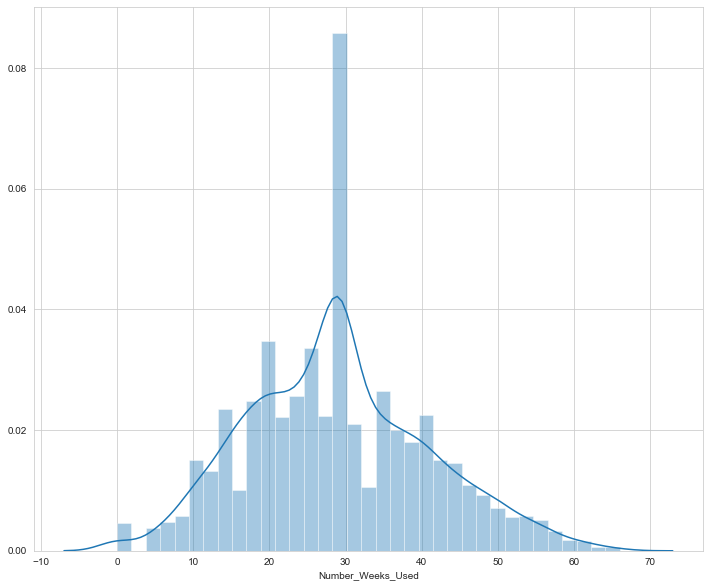

In [26]:
sns.distplot(df_train["Number_Weeks_Used"])
plt.show()

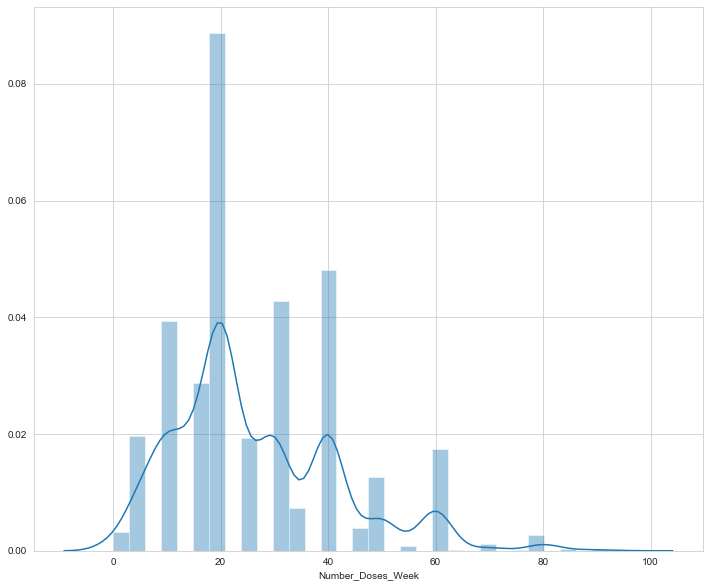

In [27]:
sns.distplot(df_train["Number_Doses_Week"])
plt.show()

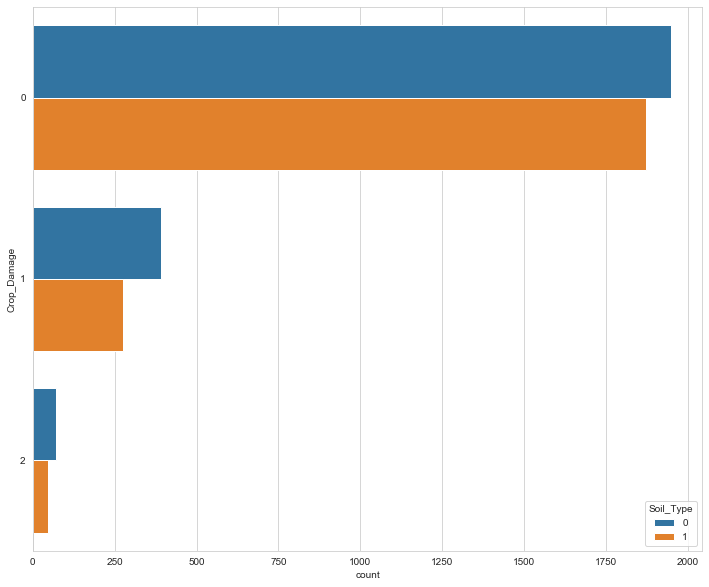

In [28]:
# We see crops are damaged more due to other reasons in soil type 0
sns.countplot(hue='Soil_Type',y='Crop_Damage',data=df_train)
plt.show()

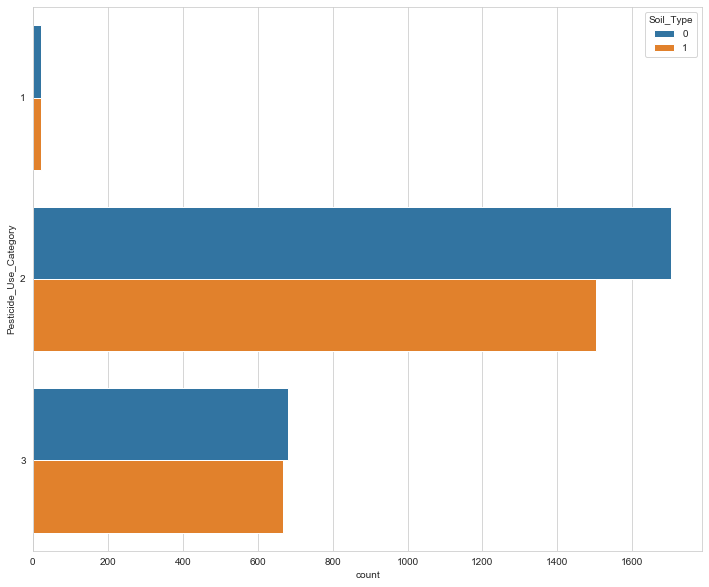

In [29]:
# previosly pesticides were used more in soil type 0 & currenty there is minor increase in pesticide used in soil type 0 than soil type 1
sns.countplot(hue='Soil_Type',y='Pesticide_Use_Category',data=df_train)
plt.show()

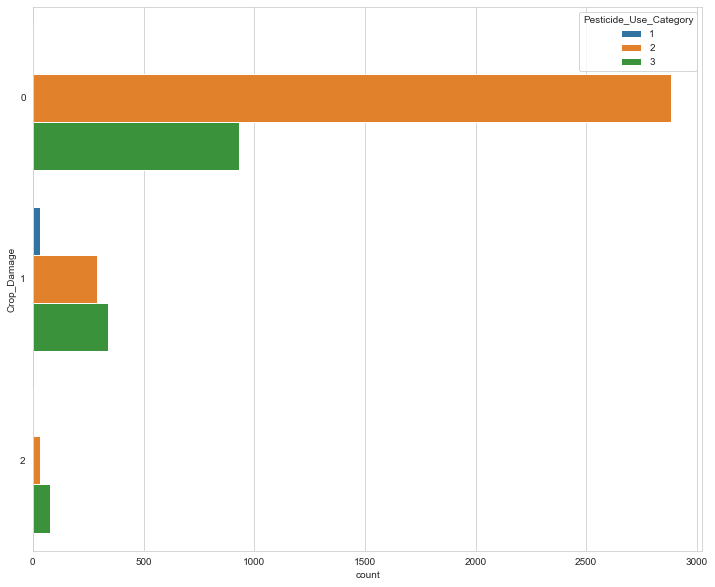

In [30]:
# cases of crops damaged due to pesticides is more currenty than previous.
sns.countplot(hue='Pesticide_Use_Category',y='Crop_Damage',data=df_train)
plt.show()

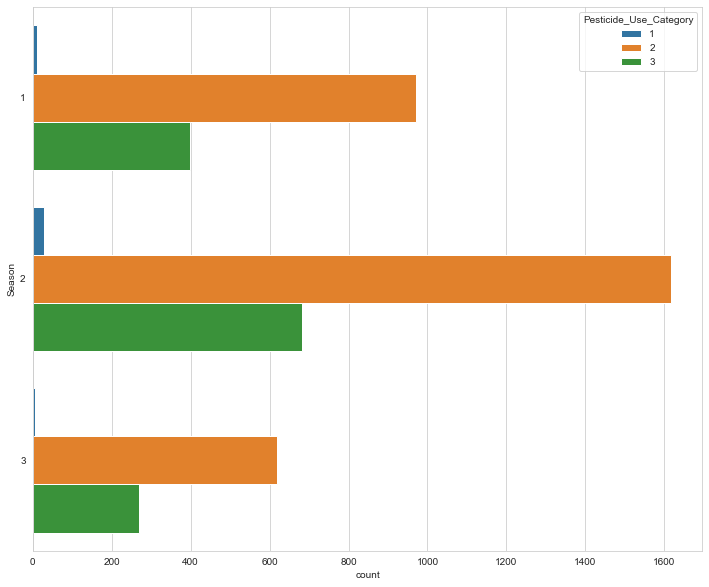

In [31]:
# pesticides were used more in season 2 previously
sns.countplot(hue='Pesticide_Use_Category',y='Season',data=df_train)
plt.show()

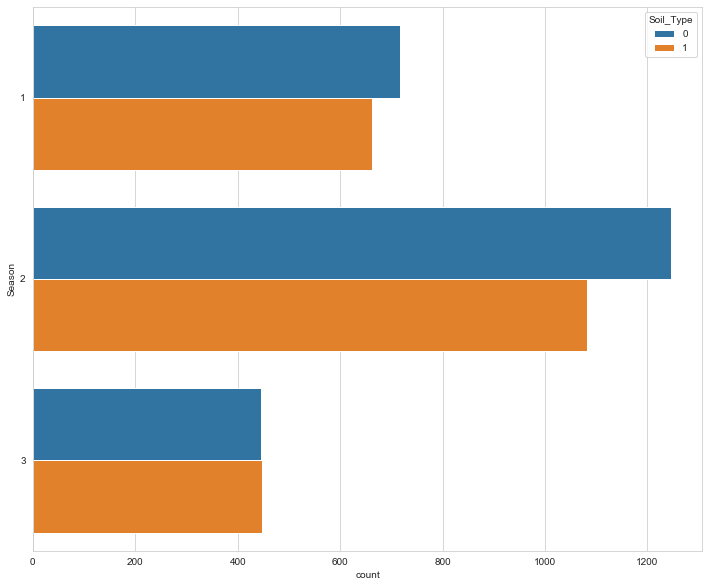

In [32]:
# in season 2 & 1 soil type 0 is more used
sns.countplot(hue='Soil_Type',y='Season',data=df_train)
plt.show()

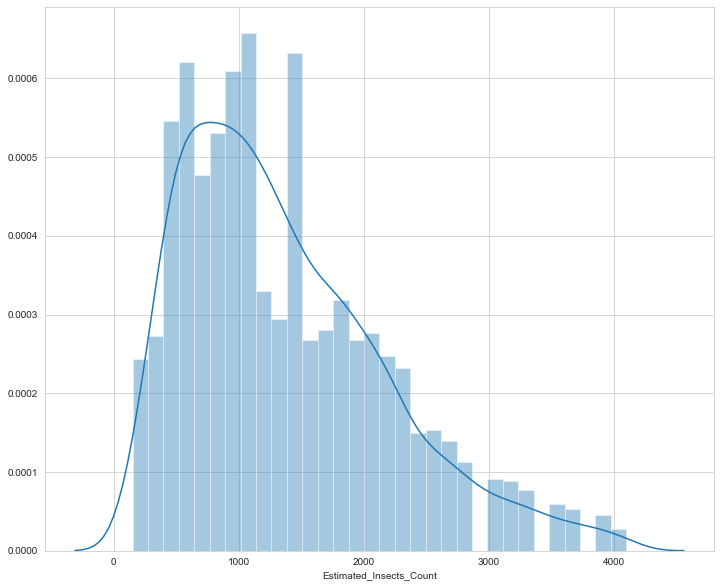

In [33]:
sns.distplot(df_train["Estimated_Insects_Count"])
plt.show()

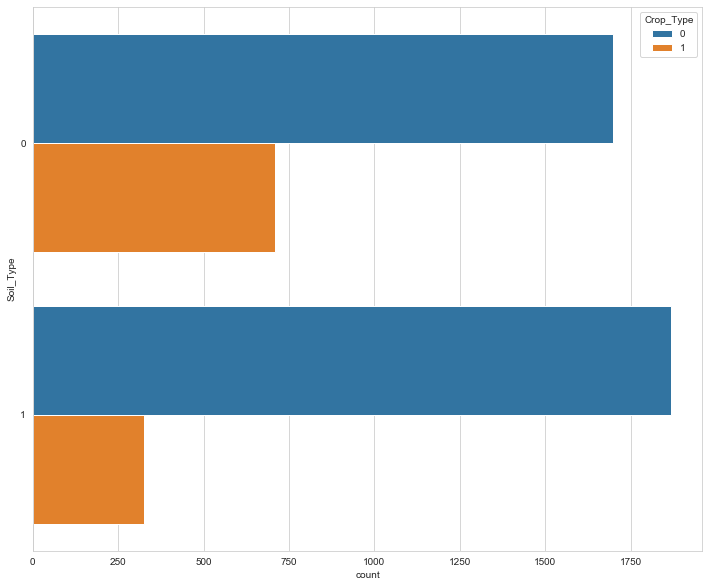

In [34]:
# crop type 0 is more used in both soil type
sns.countplot(hue='Crop_Type',y='Soil_Type',data=df_train)
plt.show()

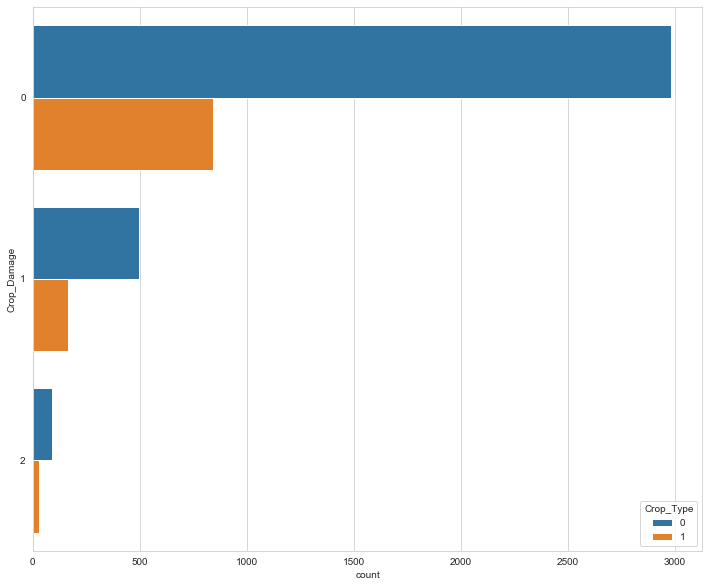

In [35]:
# crop type 0 is more damaged than crop type 1
sns.countplot(hue='Crop_Type',y='Crop_Damage',data=df_train)
plt.show()

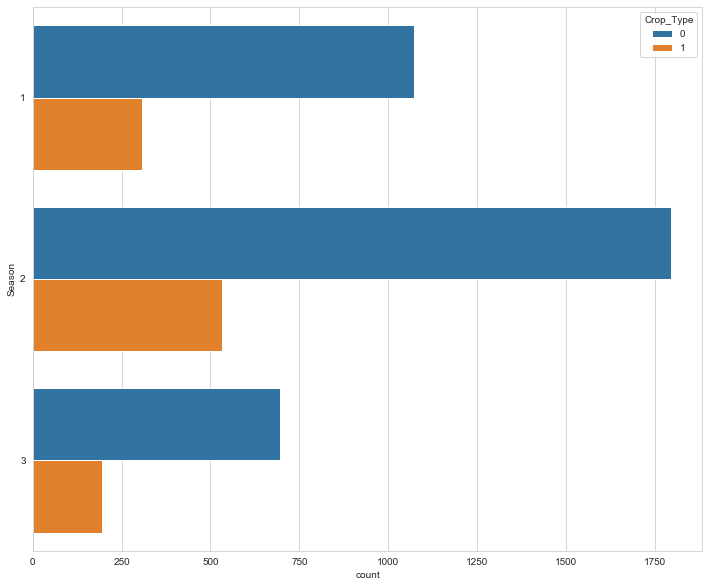

In [36]:
# crop type 0 ismore used in all seasons
sns.countplot(hue='Crop_Type',y='Season',data=df_train)
plt.show()

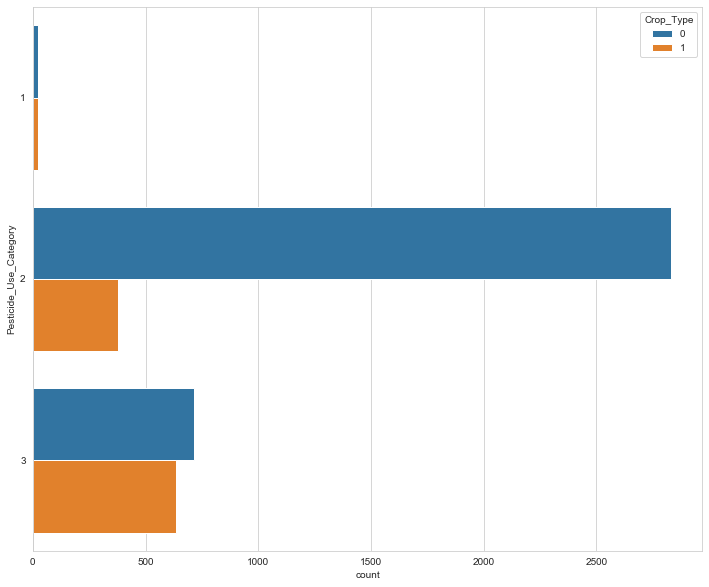

In [37]:
# crop type 0 was more damaged due to pesticides previosly and same trend is happening currently
sns.countplot(hue='Crop_Type',y='Pesticide_Use_Category',data=df_train)
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


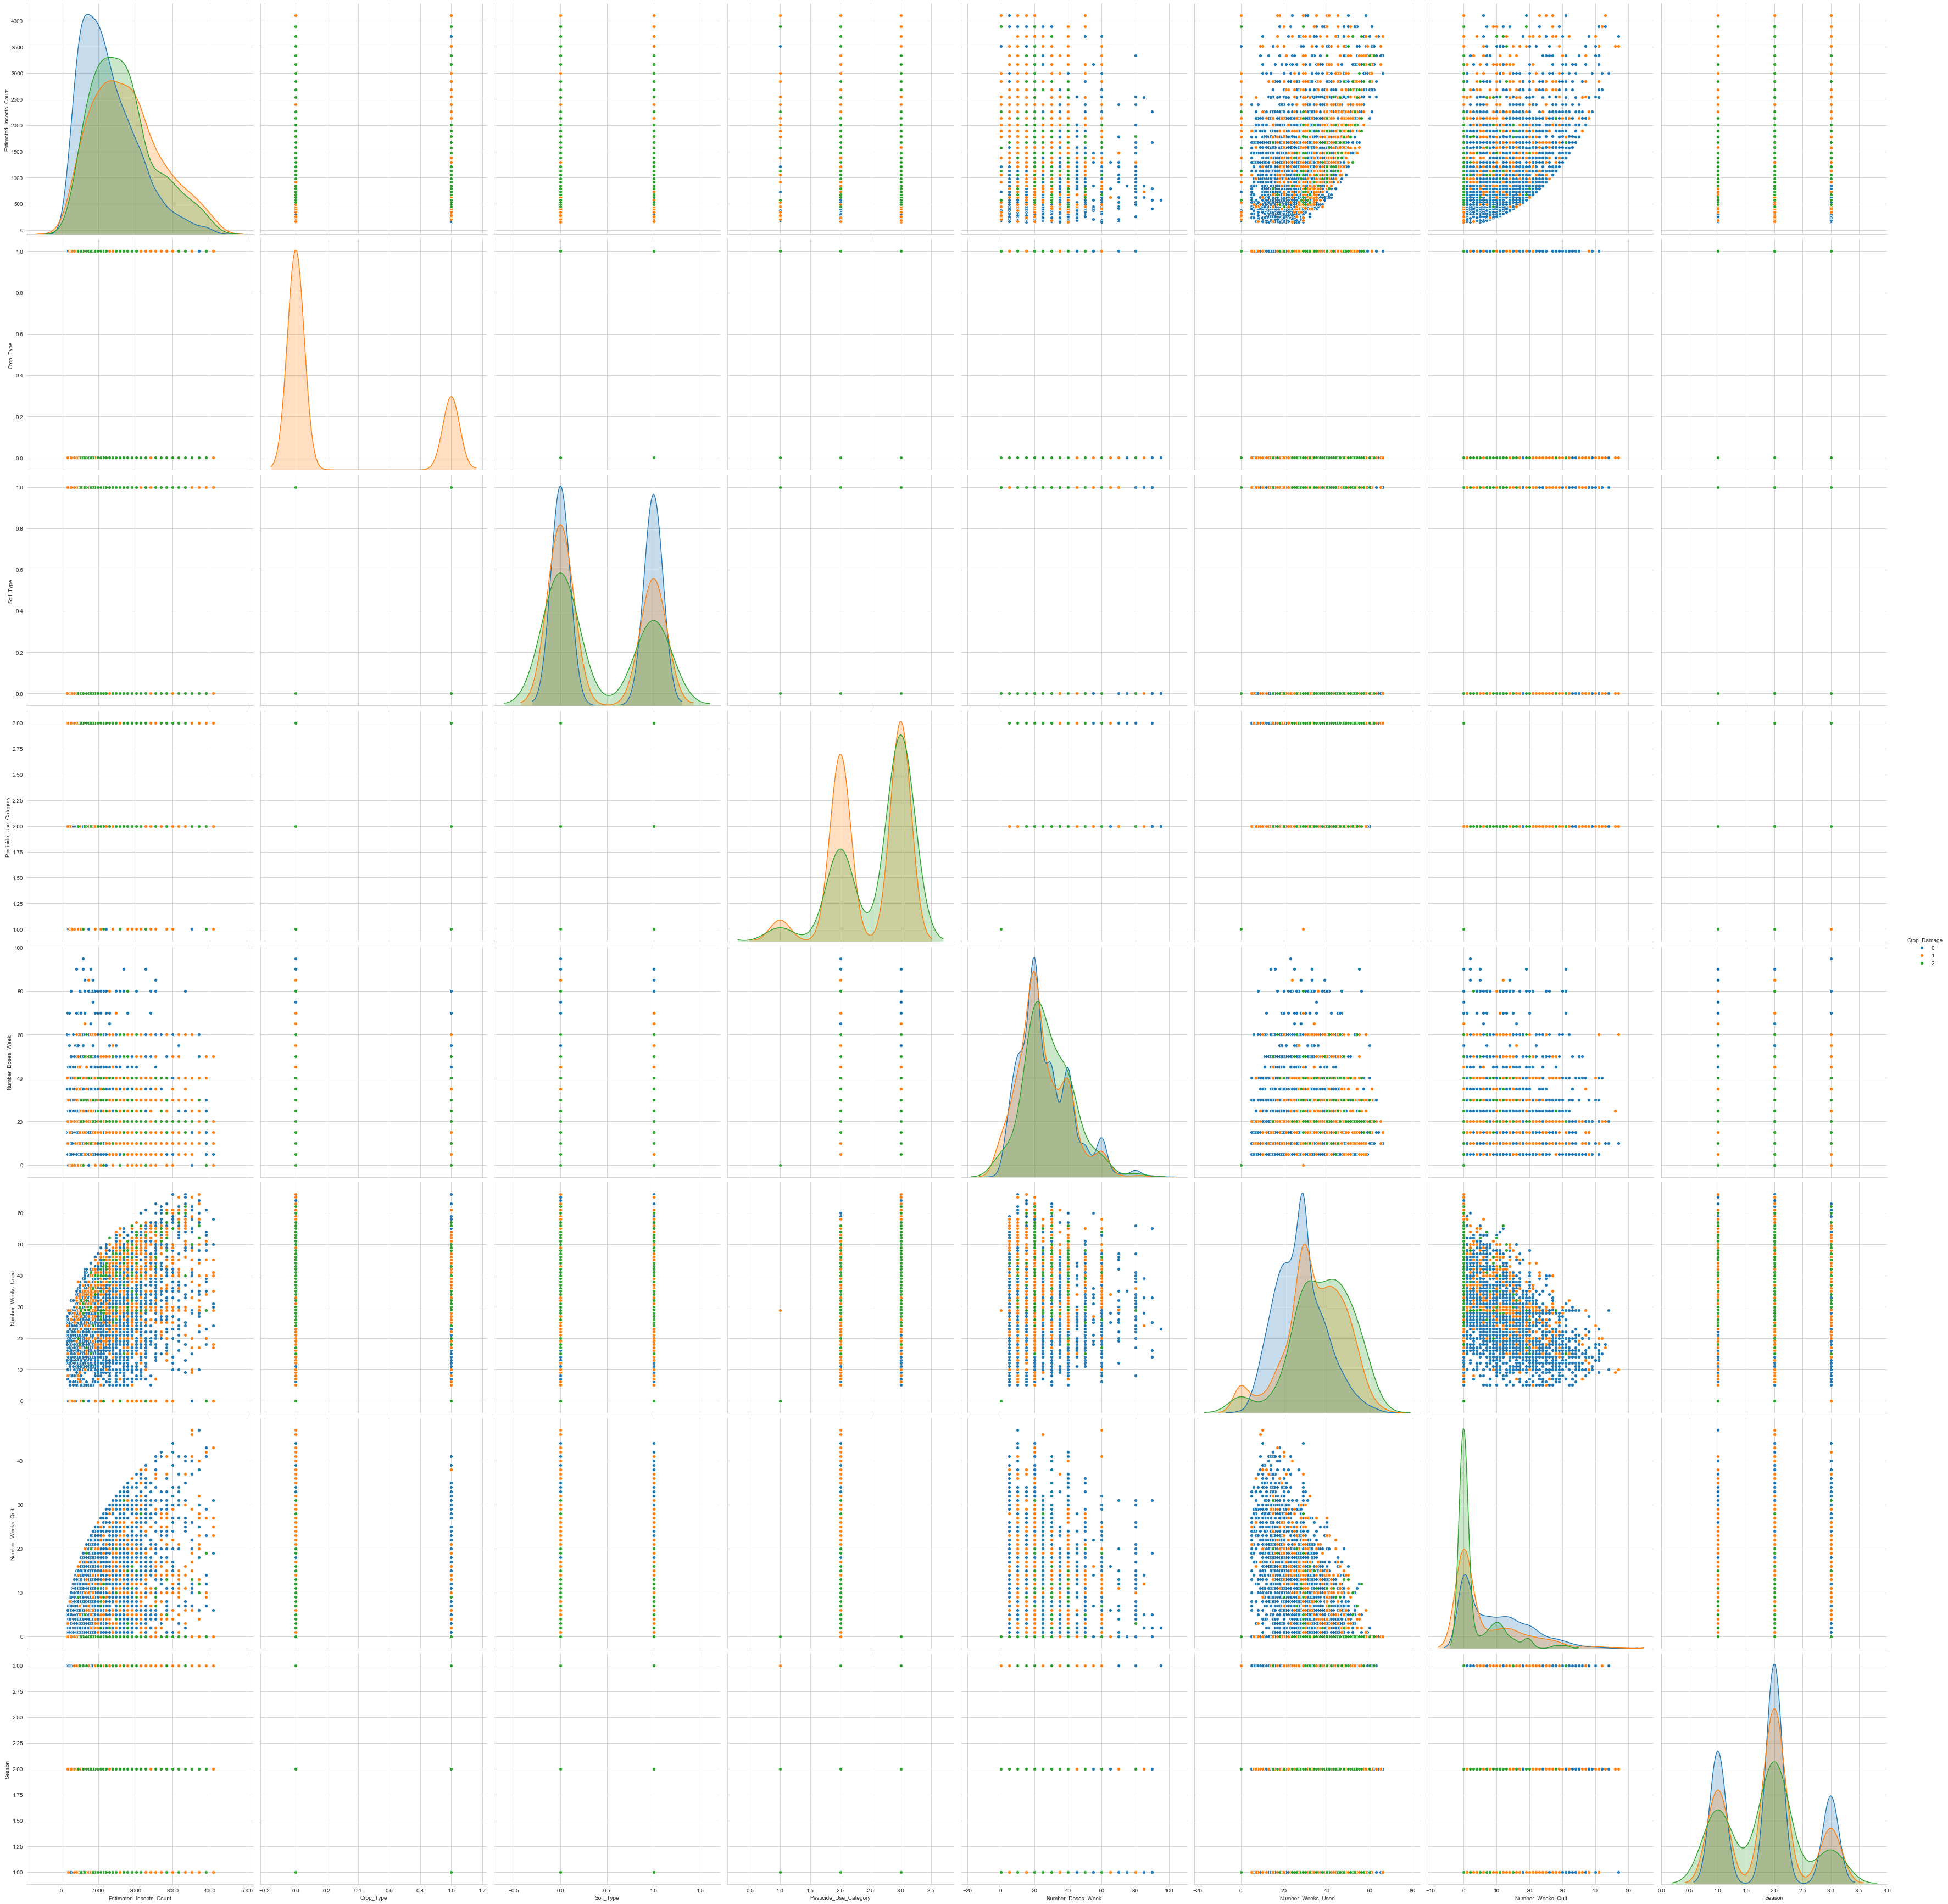

In [38]:
# Interaction between pairs of features.
sns.pairplot(df_train, 
             hue="Crop_Damage", 
             diag_kind="kde",
             size=6);

In [39]:
df_train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


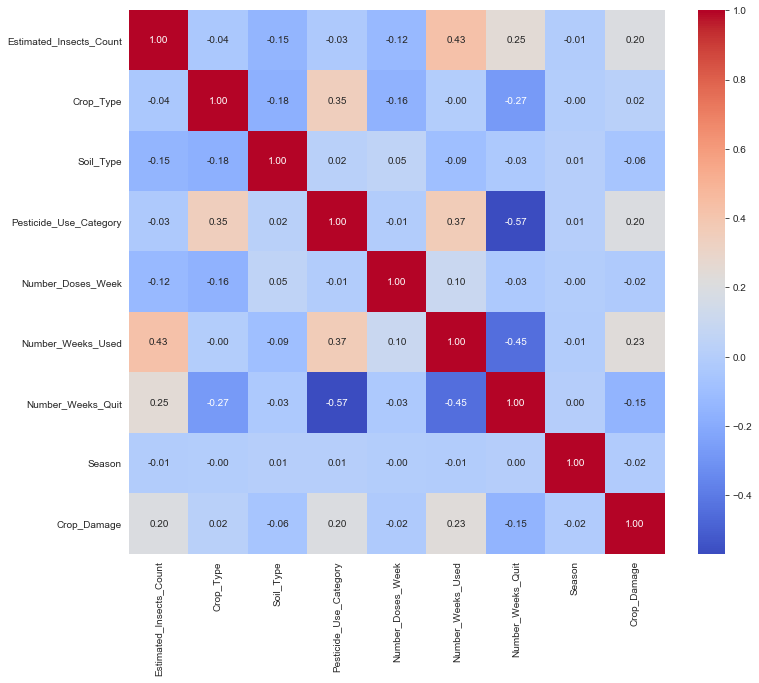

In [40]:
# Correlation matrix between numerical values
sns.heatmap(df_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [41]:
#dorp ID column from train
df_train.drop('ID',axis=1,inplace=True)
df_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [42]:
#drop ID column from test
df_test.drop('ID',axis=1,inplace=True)
df_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1


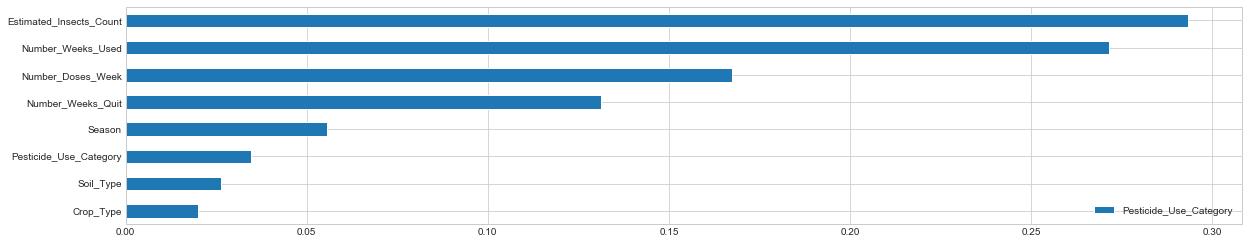

In [43]:
# Using Random Forest to gain an insight on Feature Importance
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(df_train.drop('Crop_Damage', axis=1), df_train['Crop_Damage'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df_train.drop('Crop_Damage', axis=1).columns, columns=["Pesticide_Use_Category"])
importance.sort_values(by='Pesticide_Use_Category', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));


In [44]:
# Apply Scaling 
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df_train.drop('Crop_Damage', axis=1))
X_train = std_scale.transform(df_train.drop('Crop_Damage', axis=1))
Y_train = df_train['Crop_Damage']
X_test = df_test

In [45]:
#check
X_train

array([[-1.44286807,  1.85681868, -0.95429408, ..., -2.4147325 ,
        -0.94782668, -1.28702725],
       [-1.41708065,  1.85681868, -0.95429408, ..., -2.4147325 ,
        -0.94782668,  0.15207762],
       [-1.35813798,  1.85681868, -0.95429408, ..., -2.4147325 ,
        -0.94782668,  0.15207762],
       ...,
       [ 1.11008649, -0.53855555,  1.04789501, ..., -1.82966754,
         1.83218282,  0.15207762],
       [ 1.11008649, -0.53855555,  1.04789501, ..., -0.74311834,
         1.52329287,  0.15207762],
       [ 1.11008649, -0.53855555,  1.04789501, ...,  0.34343086,
         0.80254967,  0.15207762]])

In [46]:
#check 
Y_train

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4599, dtype: int64

In [47]:
#lets check the shape of train test sets
X_train.shape, Y_train.shape, X_test.shape

((4599, 8), (4599,), (1199, 8))

In [48]:
#import model libraries
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [49]:
#define target classes
num_class1, num_class2, num_class3 = Counter(Y_train)[0], Counter(Y_train)[1], Counter(Y_train)[2]

print(num_class1)
print(num_class2)
print(num_class3)

3820
664
115


In [50]:
Counter(Y_train)

Counter({0: 3820, 1: 664, 2: 115})

In [51]:
#lets use LGBM
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y_train[train], Y_train[test]
    
    num_class1, num_class2, num_class3 = Counter(y_train)[0], Counter(y_train)[1], Counter(y_train)[2]
    sm = SMOTE(random_state=27, sampling_strategy={0: int(1.3*num_class1), 1: int(7*num_class2), 2: int(3.2*num_class3)})
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    model = LGBMClassifier(random_state=27, max_depth=6,num_leaves=13, n_estimators=400)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

0.8067546583850932
0.7684684953289606
0.7904915059162592
0.7995297912275755
0.7926570116670001
Average:  0.7915802925049776


In [52]:
#Make final prediction using LGBM
sm = SMOTE(random_state=27, sampling_strategy={0: int(1.3*num_class1), 1: int(7*num_class2), 2: int(3.2*num_class3)})
x_train, y_train = sm.fit_resample(x_train, y_train)

model1 = LGBMClassifier(random_state=27, max_depth=6,num_leaves=13, n_estimators=800)
model1.fit(X_train, Y_train)
preds = model1.predict_proba(X_test)

In [53]:
preds[0]

array([0.89949537, 0.09747504, 0.00302959])

In [54]:
preds=np.argmax(preds,axis=1)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
pd.DataFrame(preds).to_csv("AgriculturePredLG.csv", index=None)

In [56]:
#Making prediction using Catboost
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y_train[train], Y_train[test]
    
    model = CatBoostClassifier(random_state=27, max_depth=4, task_type="CPU", devices="0:1", n_estimators=1000, verbose=500)
    model.fit(x_train, y_train)
    preds_t = model.predict(x_test)
    score = f1_score(y_test, preds_t, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

Learning rate set to 0.084562
0:	learn: 1.0023529	total: 353ms	remaining: 5m 53s
500:	learn: 0.3741743	total: 1.65s	remaining: 1.65s
999:	learn: 0.3301159	total: 3.26s	remaining: 0us
0.7909506738443998
Learning rate set to 0.084562
0:	learn: 1.0011018	total: 7.36ms	remaining: 7.35s
500:	learn: 0.3594570	total: 1.42s	remaining: 1.41s
999:	learn: 0.3174443	total: 2.7s	remaining: 0us
0.793983624487142
Learning rate set to 0.084562
0:	learn: 1.0015557	total: 5.59ms	remaining: 5.59s
500:	learn: 0.3585479	total: 1.6s	remaining: 1.6s
999:	learn: 0.3165608	total: 2.86s	remaining: 0us
0.7910584859552151
Learning rate set to 0.084562
0:	learn: 1.0026777	total: 7.64ms	remaining: 7.63s
500:	learn: 0.3712365	total: 1.28s	remaining: 1.28s
999:	learn: 0.3251732	total: 2.83s	remaining: 0us
0.7943763664301625
Learning rate set to 0.084563
0:	learn: 1.0019679	total: 4.47ms	remaining: 4.47s
500:	learn: 0.3609271	total: 1.31s	remaining: 1.3s
999:	learn: 0.3168129	total: 2.56s	remaining: 0us
0.789054041504

In [57]:
model2 = CatBoostClassifier(random_state=27, task_type="CPU", devices="0:1", n_estimators=1000, max_depth=4, verbose=500)
model2.fit(X_train, Y_train)
preds1 = model2.predict_proba(X_test)

Learning rate set to 0.08553
0:	learn: 1.0005842	total: 10.3ms	remaining: 10.3s
500:	learn: 0.3725621	total: 1.83s	remaining: 1.82s
999:	learn: 0.3354988	total: 3.34s	remaining: 0us


In [58]:
preds1[0]

array([0.84811952, 0.04322951, 0.10865097])

In [59]:
preds1=np.argmax(preds1,axis=1)
preds1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
pd.DataFrame(preds1).to_csv("AgriculturePredCB.csv", index=None)

In [61]:
#Making predictions using XGBoost
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y_train[train], Y_train[test]
    
    model = XGBClassifier(random_state=27, max_depth=4, n_estimators=120)
    model.fit(x_train, y_train)
    preds_t = model.predict(x_test)
    score = f1_score(y_test, preds_t, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

0.7977968712650394
0.7771308116497246
0.7992624183978235
0.7905153600029591
0.7932206699127664
Average:  0.7915852262456626


In [62]:
#Make final prediction using XGB
sm = SMOTE(random_state=27, sampling_strategy={0: int(1.3*num_class1), 1: int(7*num_class2), 2: int(3.2*num_class3)})
x_train, y_train = sm.fit_resample(x_train, y_train)

model3 = XGBClassifier(random_state=27, max_depth=4, n_estimators=120)
model3.fit(X_train, Y_train)
preds2 = model3.predict_proba(X_test)

In [63]:
preds2[0]

array([0.68837035, 0.27979472, 0.0318349 ], dtype=float32)

In [64]:
preds2=np.argmax(preds2,axis=1)
preds2

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [65]:
pd.DataFrame(preds2).to_csv("AgriculturePredXG.csv", index=None)

In [66]:
# save the model
import pickle
filename = 'agri_model.pkl'
pickle.dump(model2, open(filename, 'wb'))

***